In [1]:
#Installing and importing the necessary packages

!pip install --user imbalanced-learn scikit-learn
# pip install --upgrade --user imbalanced-learn scikit-learn
!pip install --user imbalanced-learn
!pip install xgboost
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import sklearn 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, log_loss,roc_curve, auc,RocCurveDisplay, PrecisionRecallDisplay,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
# Import the dataset from a CSV file
# Ensure the file path is correctly specified to your local system
# In this case, the dataset is stored in a directory under OneDrive

dataset=pd.read_csv(r'C:\Users\znpr9756\OneDrive - orange.com\Documents\Data science\creditcard.csv')


# Display the first few rows of the dataset to verify it has been loaded correctly
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Set the pandas option to display all columns when printing a DataFrame
# By default, pandas may truncate columns when printing large DataFrames
# Setting max_columns to None ensures that all columns are displayed

pd.options.display.max_columns=None

In [4]:
# Display the first 5 rows of the dataset
# This is useful to quickly inspect the structure of the dataset, 
# including column names and data types, and to get a sense of the data

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Display the shape of the dataset as (number of rows, number of columns)
# This is useful to understand the dimensions of the dataset
# It returns a tuple: (number of rows, number of columns)

dataset.shape

(284807, 31)

In [6]:
# Display summary information about the dataset, including the number of entries, column names, 
# data types, and the number of non-null values for each column.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Calculate and display the number of missing (null) values for each column in the dataset.

dataset.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Count the number of duplicate rows in the dataset.

dataset.duplicated().sum()

1081

In [9]:
# Remove duplicate rows from the dataset to ensure each entry is unique.

dataset.drop_duplicates(inplace=True)

In [10]:
# Verify if there are any remaining duplicate rows in the dataset after removing duplicates.

dataset.duplicated().sum()

0

In [11]:
# Generate descriptive statistics for the dataset, including measures such as count, mean,
# standard deviation, min, max, and quartiles for numerical columns.

dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [12]:
# Count the number of occurrences of each unique value in the 'Class' column.

dataset['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [13]:
# Initialize the StandardScaler and apply it to standardize the 'Amount' column in the dataset.

sc = StandardScaler()
dataset['Amount'] = sc.fit_transform(pd.DataFrame(dataset['Amount']))

In [14]:
# Display the first few rows of the dataset to inspect the initial data.

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [15]:
# Convert the 'Time' column to datetime format for proper time series analysis.

dataset['Time'] = pd.to_datetime(dataset['Time'])

In [16]:
# Display updated summary information about the dataset, including data types and non-null counts after recent transformations.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Time    283726 non-null  datetime64[ns]
 1   V1      283726 non-null  float64       
 2   V2      283726 non-null  float64       
 3   V3      283726 non-null  float64       
 4   V4      283726 non-null  float64       
 5   V5      283726 non-null  float64       
 6   V6      283726 non-null  float64       
 7   V7      283726 non-null  float64       
 8   V8      283726 non-null  float64       
 9   V9      283726 non-null  float64       
 10  V10     283726 non-null  float64       
 11  V11     283726 non-null  float64       
 12  V12     283726 non-null  float64       
 13  V13     283726 non-null  float64       
 14  V14     283726 non-null  float64       
 15  V15     283726 non-null  float64       
 16  V16     283726 non-null  float64       
 17  V17     283726 non-null  floa

In [17]:
# Compute the correlation matrix for the dataset to understand the relationships between numerical variables.

cor = dataset.corr()
cor

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021
V10,0.000815,0.000620,-0.009632,0.002753,-0.006050,-0.002180,-0.013617,0.000481,-0.012613,1.000000,0.000844,-0.006942,0.001379,0.000168,-0.002293,-0.003715,-0.007877,-0.002450,0.001067,-0.004448,0.003777,-0.000481,0.001917,0.000154,-0.000565,0.001089,0.010769,0.009159,-0.102255,-0.206971


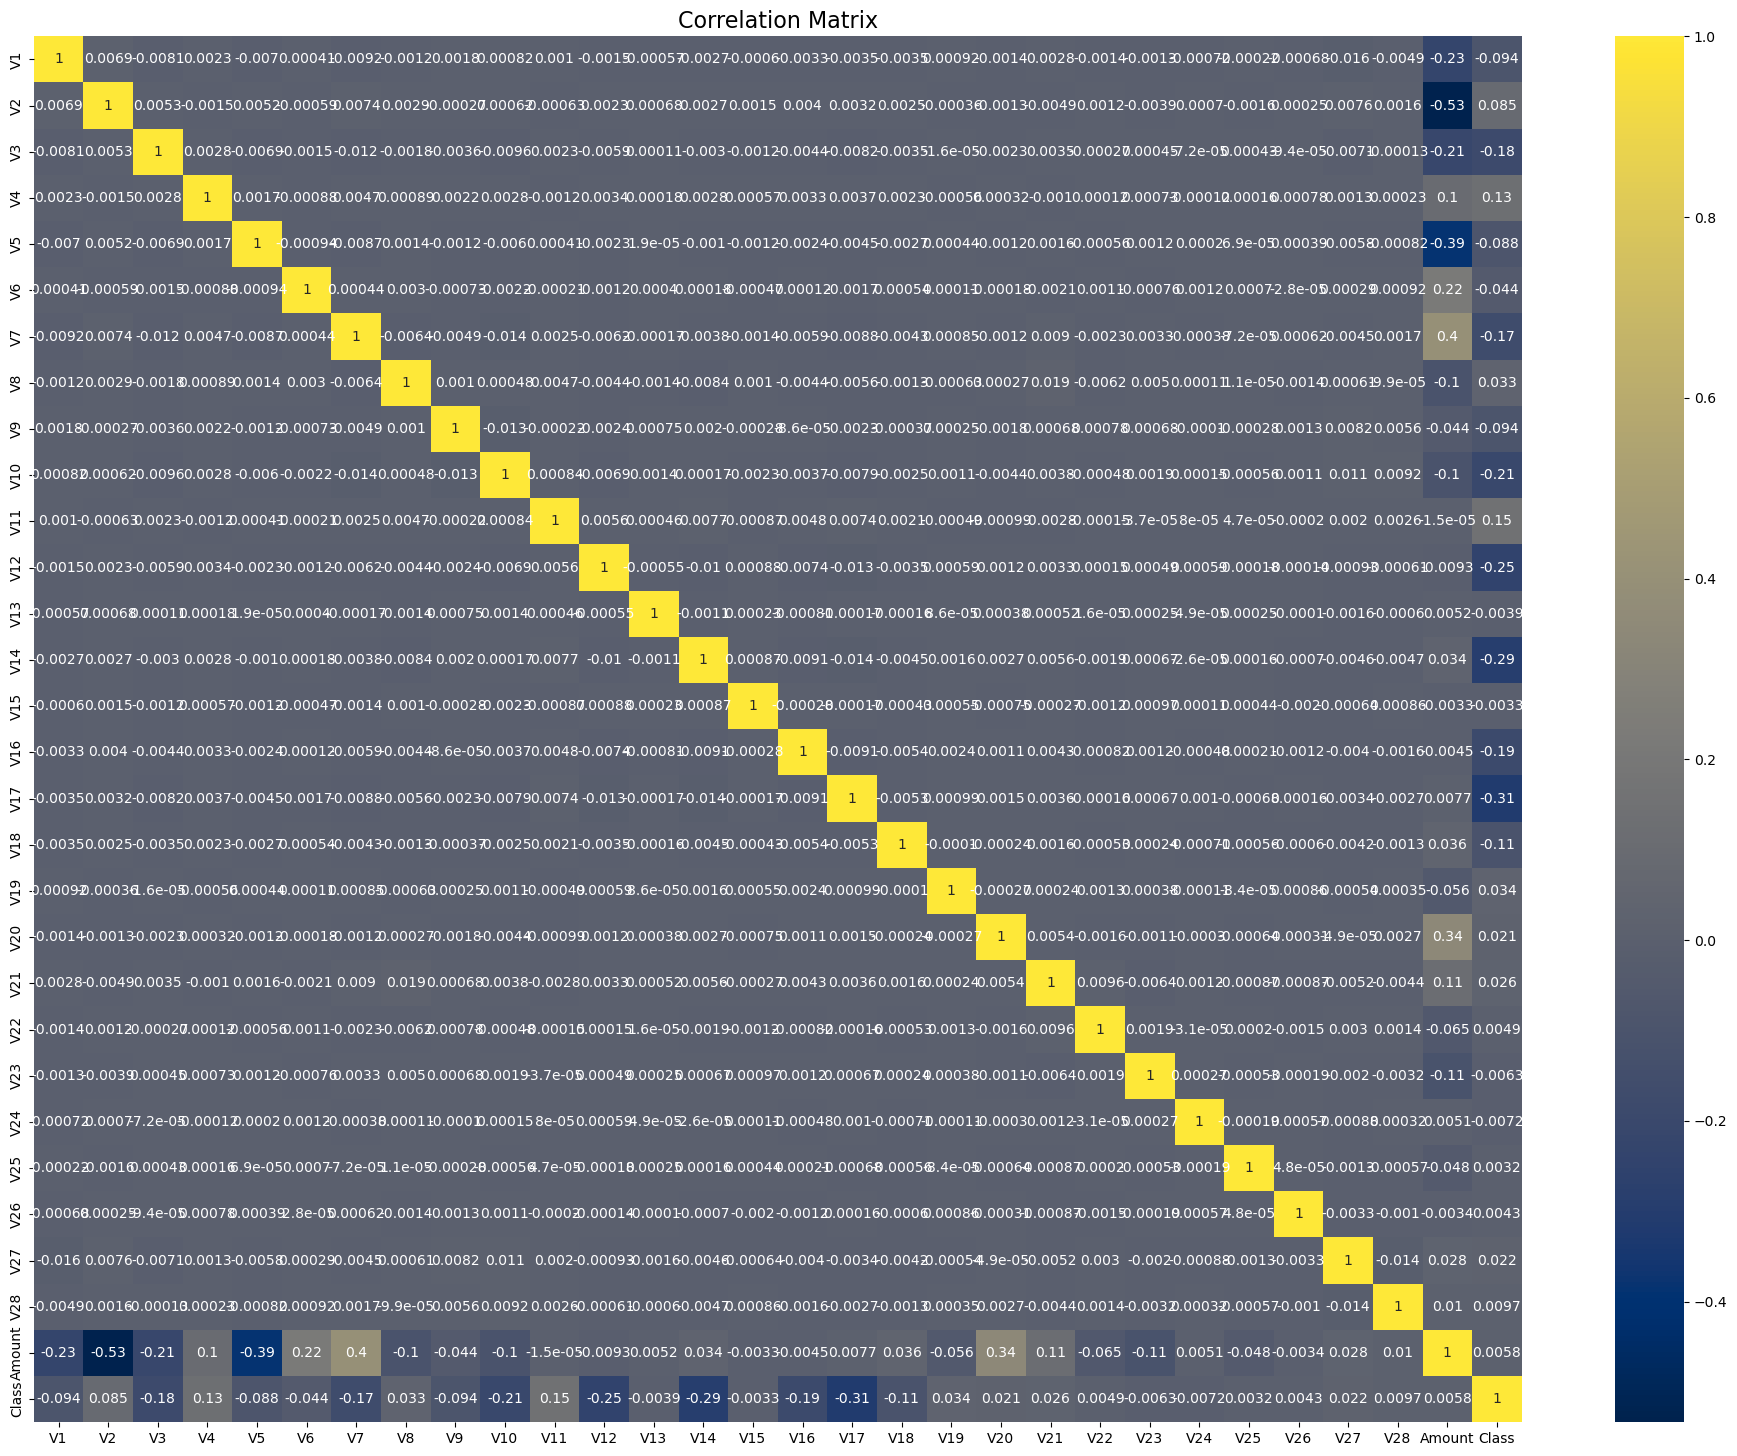

In [18]:
# Create a heatmap to visualize the correlation matrix of the dataset with annotations and a color map.

plt.figure(figsize=(24,18))
sns.heatmap(cor, cmap="cividis", annot=True)
plt.title("Correlation Matrix",fontsize=16)
plt.savefig("correlation_matrix.png")
plt.show()

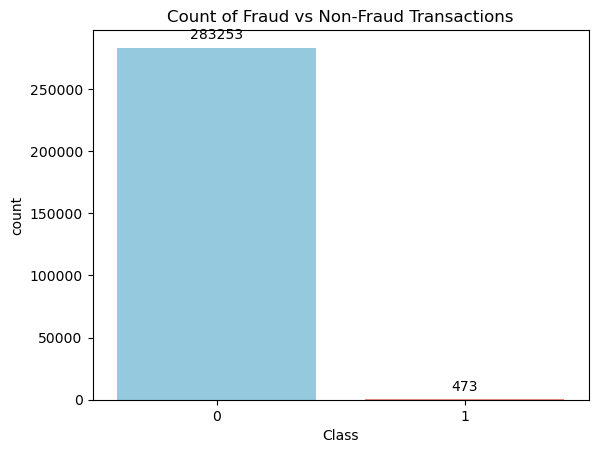

In [19]:
# Create a count plot for the 'Class' column to visualize the distribution of different class labels in the dataset.

sns.countplot(x='Class', data=dataset, palette=['skyblue', 'salmon'])

# Add value annotations to each bar in the count plot
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), 'd'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
plt.title("Count of Fraud vs Non-Fraud Transactions")
plt.savefig("Transaction_Counts.png")
plt.show()

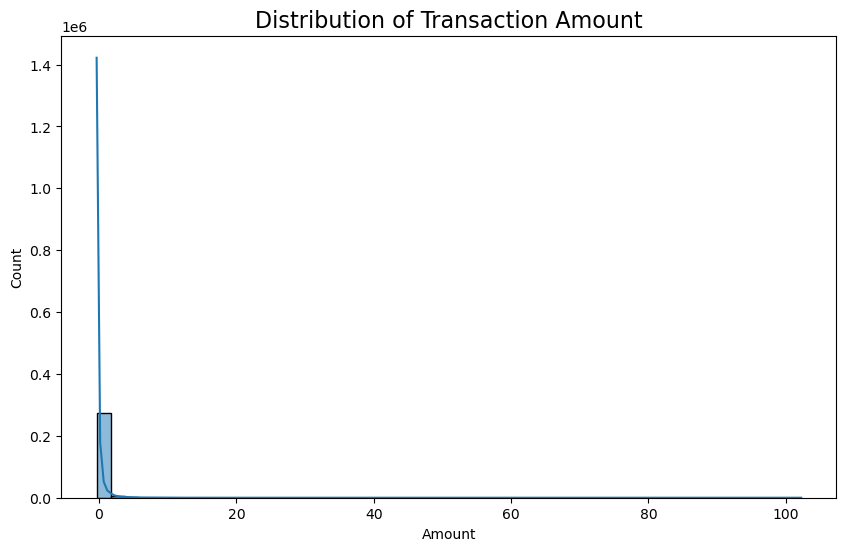

In [20]:
# Distribution of 'Amount' feature (before scaling)

plt.figure(figsize=(10, 6))
sns.histplot(dataset['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amount", fontsize=16)
plt.savefig("Transaction_Distribution.png")
plt.show()

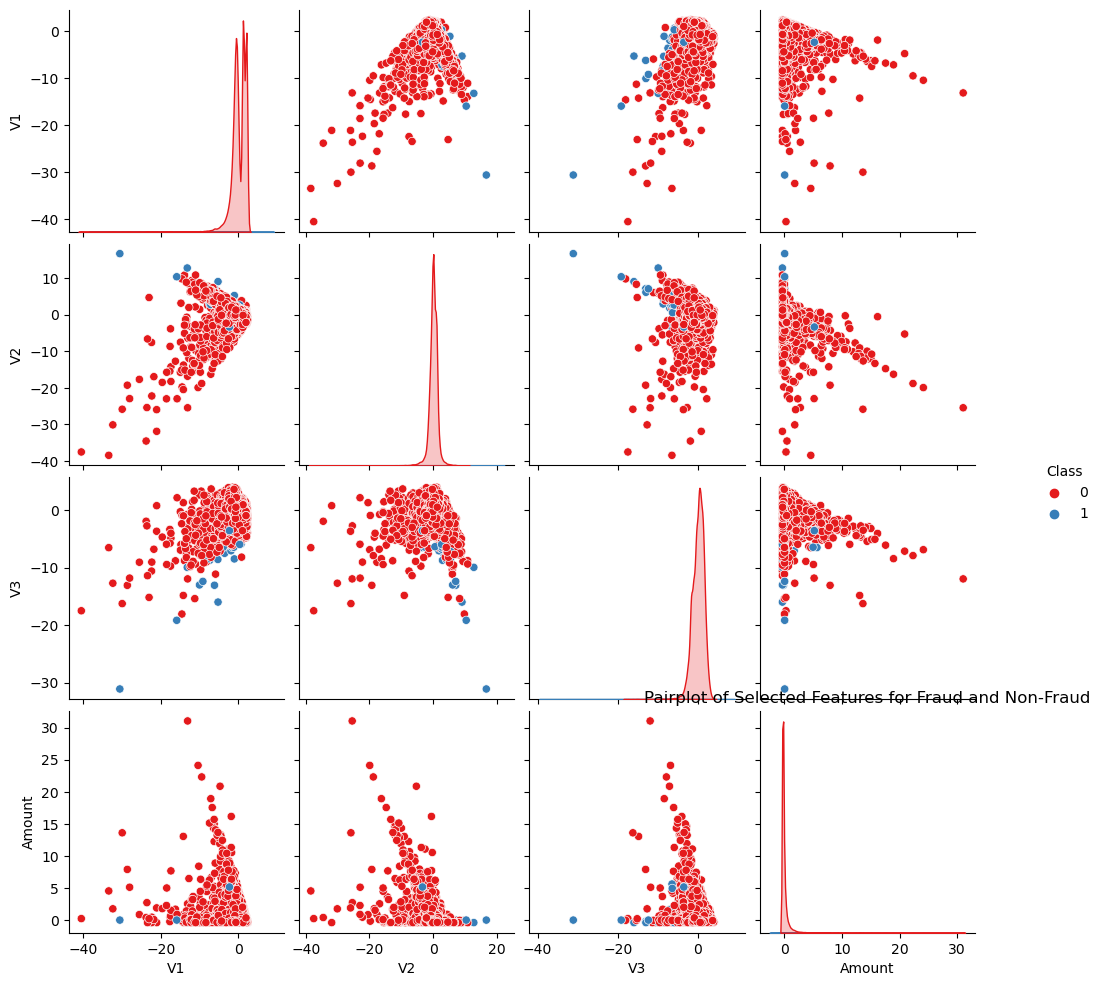

In [21]:
# Pairplot of selected features for Fraud vs Non-Fraud (reduced sample for better visualization)

subset = dataset.sample(frac=0.1, random_state=42)
sns.pairplot(subset, hue='Class', vars=['V1', 'V2', 'V3', 'Amount'], palette = 'Set1')
plt.title("Pairplot of Selected Features for Fraud and Non-Fraud")
plt.savefig("Pairplot.png")
plt.show()

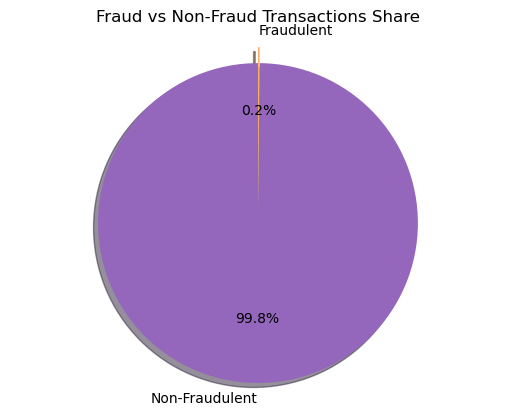

In [22]:
# Pie chart to visualize the class distribution (Fraud vs Non-Fraud)
classes = dataset['Class'].value_counts()
normal_share = classes[0] / dataset['Class'].count() * 100
fraud_share = classes[1] / dataset['Class'].count() * 100
labels = ['Non-Fraudulent', 'Fraudulent']
sizes = [normal_share, fraud_share]
explode = (0, 0.1)
colors = ['#9467bd', '#fdae61']  # Purple and Yellow
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,colors=colors)
plt.title("Fraud vs Non-Fraud Transactions Share")
plt.axis('equal')
plt.savefig("class_distribution.png")
plt.show()

In [23]:
# Count the number of occurrences of each unique value in the 'Class' column to understand the distribution of class labels.

dataset['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [24]:
# Calculate the percentage share of normal and fraudulent transactions.
# `normal_share` represents the percentage of non-fraudulent transactions.
# `fraud_share` represents the percentage of fraudulent transactions.

classes = dataset['Class'].value_counts()
normal_share = classes[0] / dataset['Class'].count() * 100
fraud_share = classes[1] / dataset['Class'].count() * 100


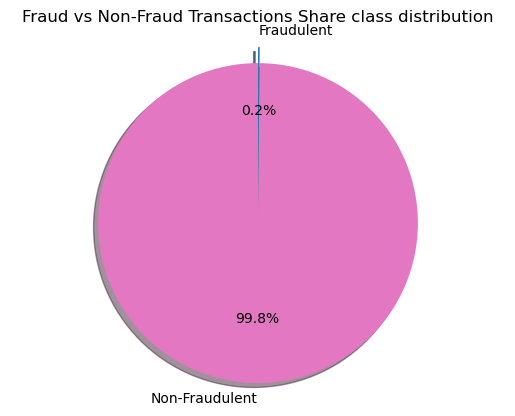

In [25]:
# Define labels for each segment of the pie chart and their respective sizes.
# `explode` determines the fraction of the radius to offset each slice.
# `fig1` and `ax1` create a subplot for the pie chart.
# `ax1.pie()` generates the pie chart with specified parameters including segment labels, sizes, and formatting.
# `ax1.axis('equal')` ensures the pie chart is circular.

labels = 'Non-Fraudulent', 'Fraudulent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1)
colors = ['#e377c2', '#1f77b4']  # Pink and Blue
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Fraud vs Non-Fraud Transactions Share class distribution")
plt.savefig("Share_class_distribution.png")
plt.show()


In [26]:
# Drop the 'Time' column from the dataset as it is no longer needed for analysis.

dataset = dataset.drop(['Time'], axis=1)

In [27]:
# Display the first few rows of the dataset to preview the current state after previous modifications.

dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [28]:
# Separate the features and the target variable from the dataset.
# `X` contains all columns except 'Class', which will be used as features.
# `y` contains the 'Class' column, which will be used as the target variable for prediction.

X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [29]:
# Display the shape of the feature matrix `X` to understand its dimensions, 
# i.e., the number of samples and the number of features.

X.shape

(283726, 29)

In [30]:
# Display the shape of the target vector `y` to understand its dimensions, i.e., the number of samples.

y.shape


(283726,)

In [31]:
# Apply SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance.
# `X_res` and `y_res` contain the resampled feature matrix and target vector, respectively,
# with the minority class over-sampled to balance the class distribution.

X_res, y_res = SMOTE().fit_resample(X, y)

In [32]:
# Display the value counts of the resampled target vector `y_res` to check the distribution of the classes
# after applying SMOTE and ensuring that the classes are balanced.

y_res.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [33]:
# Split the resampled dataset into training and testing sets.
# `X_train` and `y_train` are used for training the model.
# `X_test` and `y_test` are used for evaluating the model's performance.
# `test_size=0.2` specifies that 20% of the data will be used for testing.
# `random_state=42` ensures reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [34]:
# Display the number of samples in the training set `X_train` to understand the size of the training data.

len(X_train)

453204

In [35]:
# Display the number of samples in the testing set `X_test` to understand the size of the testing data.

len(X_test)

113302

In [36]:
# Initialize a logistic regression model.
# Train the model on the training data `X_train` and `y_train`.

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Use the trained logistic regression model to make predictions on the testing data `X_test`.
# `y_pred` contains the predicted class labels for the test set.

y_pred = model.predict(X_test)

In [38]:
# Display the predicted class labels for the test set `X_test` to review the model's predictions.

y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [39]:
# Calculate evaluation metrics for the logistic regression model.
# `accuracy` measures the overall correctness of the model's predictions.
# `precision` measures the model's ability to correctly identify positive instances, weighted by support.
# `recall` measures the model's ability to find all positive instances, weighted by support.
# `f1` is the harmonic mean of precision and recall, providing a single score to evaluate model performance.

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [40]:
# Print the evaluation metrics for the logistic regression model.
# Display the accuracy, precision, recall, and F1 score to assess model performance.

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9440610051014104
Precision: 0.9456863633603785
Recall: 0.9440610051014104
F1 Score: 0.9440158900985383


In [41]:
# Initialize a decision tree classifier with a fixed random state for reproducibility.
# Train the decision tree model on the training data `X_train` and `y_train`.

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
# Use the trained decision tree classifier to make predictions on the testing data `X_test`.
# `y_pred_dt` contains the predicted class labels for the test set.

y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [43]:
# Calculate evaluation metrics for the decision tree classifier.
# `accuracy` measures the overall correctness of the model's predictions.
# `precision` measures the model's ability to correctly identify positive instances, weighted by support.
# `recall` measures the model's ability to find all positive instances, weighted by support.
# `f1` is the harmonic mean of precision and recall, providing a single score to evaluate model performance.

accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

In [44]:
# Print the evaluation metrics for the decision tree classifier.
# Display the accuracy, precision, recall, and F1 score to assess model performance.

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9982171541543838
Precision: 0.9982182933541355
Recall: 0.9982171541543838
F1 Score: 0.9982171486363255


In [45]:
# Initialize a random forest classifier with a specified number of trees (n_estimators=5) 
# and a fixed random state for reproducibility.

classifier = RandomForestClassifier(n_estimators=5, random_state=42)

In [46]:
# Train the random forest classifier on the training data `X_train` and `y_train`.

classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [47]:
# Use the trained random forest classifier to make predictions on the testing data `X_test`.
# `y_pred_rf` contains the predicted class labels for the test set.

y_pred_rf = classifier.predict(X_test)
y_pred_rf

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
# Calculate evaluation metrics for the random forest classifier.
# `accuracy` measures the overall correctness of the model's predictions.
# `precision` measures the model's ability to correctly identify positive instances, weighted by support.
# `recall` measures the model's ability to find all positive instances, weighted by support.
# `f1` is the harmonic mean of precision and recall, providing a single score to evaluate model performance.

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

In [49]:
# Print the evaluation metrics for the random forest classifier.
# Display the accuracy, precision, recall, and F1 score to assess model performance.

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9998323065788777
Precision: 0.9998323414742014
Recall: 0.9998323065788777
F1 Score: 0.9998323065022627


In [50]:
# Initialize an XGBoost classifier with a fixed random state for reproducibility.

xgb_model = xgb.XGBClassifier(random_state=42)

In [51]:
# Train the XGBoost classifier on the training data `X_train` and `y_train`.

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [52]:
# Use the trained XGBoost classifier to make predictions on the testing data `X_test`.
# `y_pred_xgb` contains the predicted class labels for the test set.

y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([1, 0, 0, ..., 1, 0, 0])

In [53]:
# Calculate evaluation metrics for the XGBoost classifier.
# `accuracy` measures the overall correctness of the model's predictions.
# `precision` measures the model's ability to correctly identify positive instances, weighted by support.
# `recall` measures the model's ability to find all positive instances, weighted by support.
# `f1` is the harmonic mean of precision and recall, providing a single score to evaluate model performance.

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

In [54]:
# Print the evaluation metrics for the XGBoost classifier.
# Display the accuracy, precision, recall, and F1 score to assess model performance.

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9997616988226157
Precision: 0.9997618119681119
Recall: 0.9997616988226157
F1 Score: 0.9997616986206278


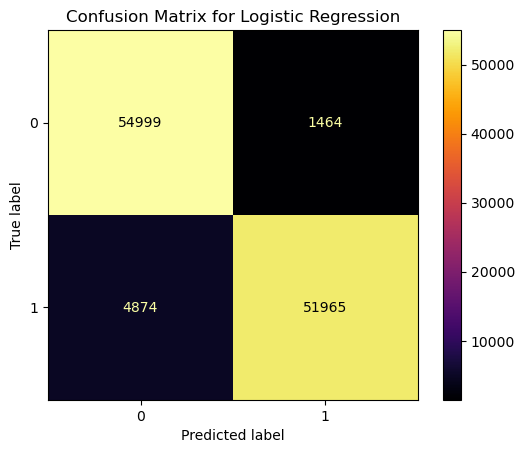

In [55]:
# Calculate the confusion matrix for the logistic regression model.
# `cm` contains the confusion matrix values.
# `ConfusionMatrixDisplay` is used to visualize the confusion matrix with appropriate labels.

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='inferno')
plt.title("Confusion Matrix for Logistic Regression")
plt.savefig("confusion_matrix_lr.png")
plt.show()

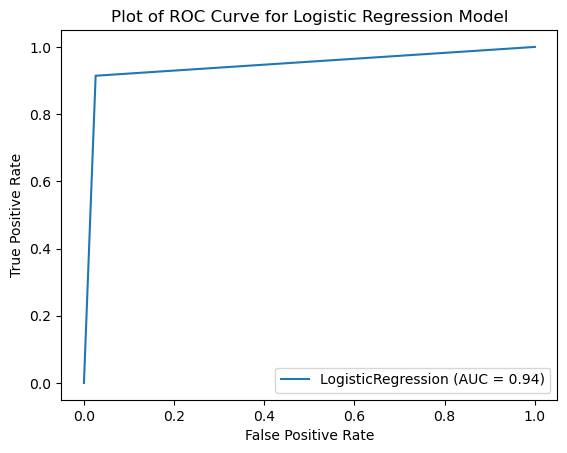

In [56]:
# Compute the ROC curve for the logistic regression model.
# `fpr` and `tpr` represent the false positive rates and true positive rates, respectively.
# `thresholds` are the decision thresholds used to compute the ROC curve.
# `roc_auc` calculates the area under the ROC curve, a measure of the model's performance.

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a RocCurveDisplay object to visualize the ROC curve with the computed fpr, tpr, and roc_auc.
# `estimator_name` specifies the name of the model for display purposes.

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='LogisticRegression')

# Plot the ROC curve and set the title for the plot.
display.plot()
plt.title("Plot of ROC Curve for Logistic Regression Model")
plt.savefig("roc_curve_lr.png")
plt.show()

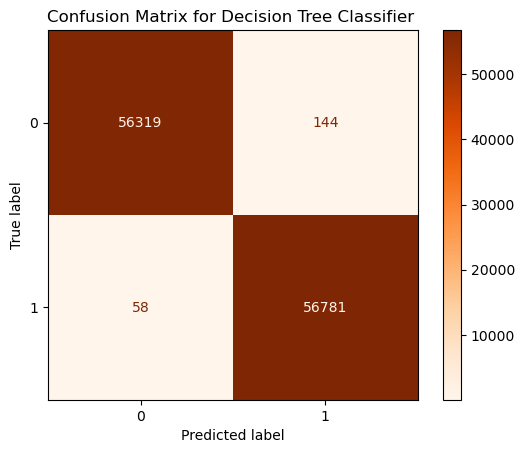

In [57]:
# Calculate the confusion matrix for the decision tree classifier.
# `cm` contains the confusion matrix values.
# `ConfusionMatrixDisplay` is used to visualize the confusion matrix with appropriate labels.

cm = confusion_matrix(y_test, y_pred_dt, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix for Decision Tree Classifier ")
plt.savefig("confusion_matrix_dtc.png")
plt.show()

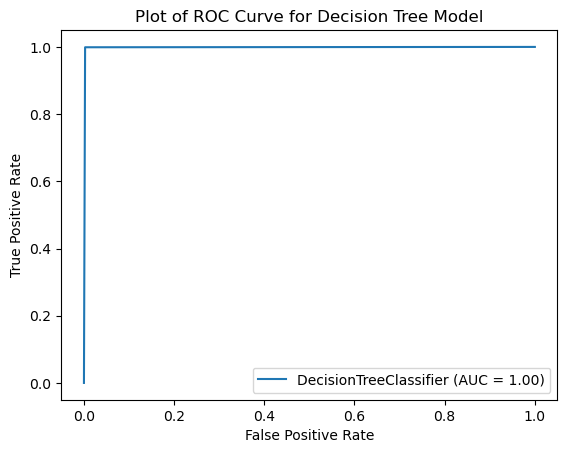

In [58]:
# Compute the ROC curve for the decision tree classifier.
# `fpr` and `tpr` represent the false positive rates and true positive rates, respectively.
# `thresholds` are the decision thresholds used to compute the ROC curve.
# `roc_auc` calculates the area under the ROC curve, a measure of the model's performance.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)

# Create a RocCurveDisplay object to visualize the ROC curve with the computed fpr, tpr, and roc_auc.
# `estimator_name` specifies the name of the model for display purposes.

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='DecisionTreeClassifier')

# Plot the ROC curve and set the title for the plot.
display.plot()
plt.title("Plot of ROC Curve for Decision Tree Model")
plt.savefig("roc_curve_dtc.png")
plt.show()

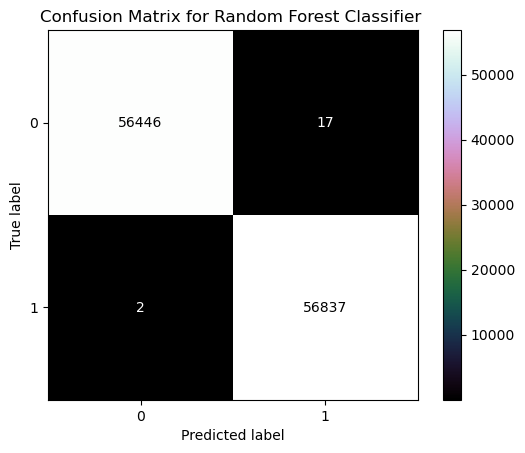

In [60]:
# Calculate the confusion matrix for the random forest classifier.
# `cm` contains the confusion matrix values.
# `ConfusionMatrixDisplay` is used to visualize the confusion matrix with appropriate labels.

cm = confusion_matrix(y_test, y_pred_rf, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='cubehelix')
plt.title("Confusion Matrix for Random Forest Classifier ")
plt.savefig("confusion_matrix_rfc.png")
plt.show()

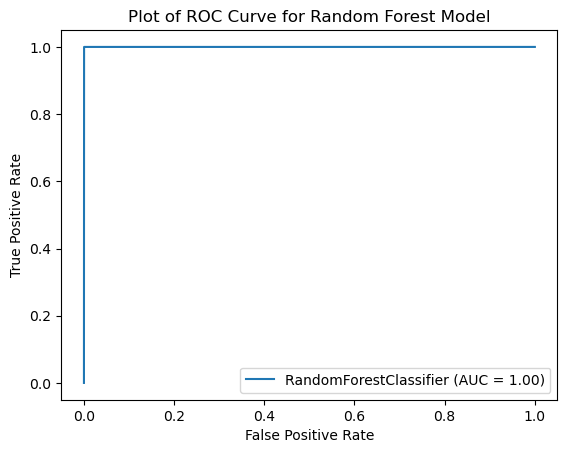

In [61]:
# Compute the ROC curve for the random forest classifier.
# `fpr` and `tpr` represent the false positive rates and true positive rates, respectively.
# `thresholds` are the decision thresholds used to compute the ROC curve.
# `roc_auc` calculates the area under the ROC curve, a measure of the model's performance.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Create a RocCurveDisplay object to visualize the ROC curve with the computed fpr, tpr, and roc_auc.
# `estimator_name` specifies the name of the model for display purposes.

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RandomForestClassifier')

# Plot the ROC curve and set the title for the plot.
display.plot()
plt.title("Plot of ROC Curve for Random Forest Model")
plt.savefig("roc_curve_rfc.png")
plt.show()

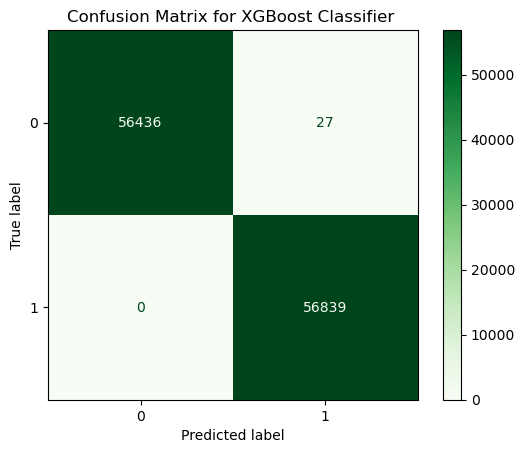

In [62]:
# Calculate the confusion matrix for the XGBoost classifier.
# `cm` contains the confusion matrix values.
# `ConfusionMatrixDisplay` is used to visualize the confusion matrix with appropriate labels.

cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)

# Plot the confusion matrix and display it.
disp.plot(cmap = 'Greens')
plt.title("Confusion Matrix for XGBoost Classifier ")
plt.savefig("confusion_matrix_xgb.png")
plt.show()

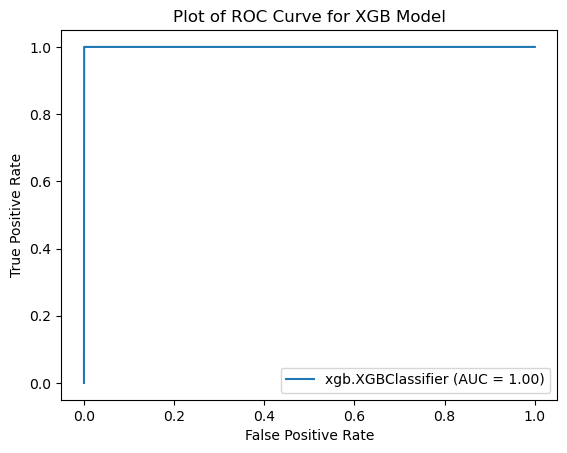

In [63]:
# Compute the ROC curve for the XGBoost classifier.
# `fpr` and `tpr` represent the false positive rates and true positive rates, respectively.
# `thresholds` are the decision thresholds used to compute the ROC curve.
# `roc_auc` calculates the area under the ROC curve, a measure of the model's performance.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

# Create a RocCurveDisplay object to visualize the ROC curve with the computed fpr, tpr, and roc_auc.
# `estimator_name` specifies the name of the model for display purposes.

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='xgb.XGBClassifier')

# Plot the ROC curve and set the title for the plot.
display.plot()
plt.title("Plot of ROC Curve for XGB Model")
plt.savefig("roc_curve_xgb.png")
plt.show()

In [64]:
# Create an empty dataframe to store the scores for various algorithms.
# The dataframe will have columns for model name, accuracy score, precision score, recall score, AUC score, and f1 score.

score_card = pd.DataFrame(columns=['model_name', 'Accuracy Score', 'Precision Score', 'Recall Score', 'AUC Score', 'f1 Score'])

# Function to update the score card with performance metrics for a given model.
# `y_test` is the true labels, `y_pred` is the predicted labels, and `model_name` is the name of the model.

def update_score_card(y_test, y_pred, model_name):
    
    # Assign 'score_card' as a global variable to update the dataframe defined outside the function.
    global score_card
    
    # Append the results to the dataframe 'score_card'.
    # 'ignore_index=True' ensures the index is not considered when concatenating.
    score_card = pd.concat([
        score_card,
        pd.DataFrame([{
            'model_name': model_name,
            'Accuracy Score': accuracy_score(y_test, y_pred),
            'Precision Score': precision_score(y_test, y_pred),
            'Recall Score': recall_score(y_test, y_pred),
            'AUC Score': roc_auc_score(y_test, y_pred),
            'f1 Score': f1_score(y_test, y_pred)
        }])
    ], ignore_index=True)

In [65]:
# Update the score card with performance metrics for each model.
# `update_score_card` function is called with test labels, predicted labels, and model names.

update_score_card(y_test, y_pred, 'Logistic Regression')
update_score_card(y_test, y_pred_dt, 'Decision Tree')
update_score_card(y_test, y_pred_rf, 'Random Forest')
update_score_card(y_test, y_pred_xgb, 'XG Boost classifier')

# Display the score card dataframe containing the performance metrics for all models.
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,Logistic Regression,0.944061,0.972599,0.914249,0.944160,0.942522
1,Decision Tree,0.998217,0.997470,0.998980,0.998215,0.998224
2,Random Forest,0.999832,0.999701,0.999965,0.999832,0.999833
3,XG Boost classifier,0.999762,0.999525,1.000000,0.999761,0.999763


In [66]:
# Initialize an XGBoost classifier with a specified random state for reproducibility.
# `xgb.XGBClassifier` is used to create the model instance.

xgb_model = xgb.XGBClassifier(random_state=42)

In [67]:
# Define the parameter grid for hyperparameter tuning using GridSearchCV.
# `param_grid` includes different values for the number of estimators, the maximum number of features to consider, and the criterion for splitting nodes.

param_grid = {
    'n_estimators': [100, 500],          # Number of trees in the forest.
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split.
    'criterion': ['gini', 'entropy']     # Function to measure the quality of a split.
}

In [68]:
# Initialize GridSearchCV to perform hyperparameter tuning for the XGBoost classifier.
# `param_grid` defines the parameters to be searched.
# `cv=5` specifies 5-fold cross-validation.

gridSearch = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data to find the best parameters.
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
           

In [69]:
# Print the best hyperparameters found by GridSearchCV.
# `gridSearch.best_params_` contains the best parameter values for the model.
# `gridSearch.best_score_` gives the best cross-validation accuracy achieved with those parameters.

print("Best Parameters:", gridSearch.best_params_)
print("Best Cross-validation Accuracy:", gridSearch.best_score_)

Best Parameters: {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 500}
Best Cross-validation Accuracy: 0.9997594903000013


In [70]:
# Retrieve the best model from the GridSearchCV object.
# `gridSearch.best_estimator_` provides the model with the best hyperparameters.

best_model = gridSearch.best_estimator_

# Predict the labels for the test set using the best model.
# `best_model.predict(X_test)` returns the predicted labels for the test data.

y_pred_best = best_model.predict(X_test)

In [71]:
# Print the classification report for the predictions made by the best model.
# The report includes precision, recall, f1-score, and support for each class.

print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



In [72]:
# Define the parameter distributions for hyperparameter tuning using RandomizedSearchCV.
# `param_distributions` includes various values for regularization strength, penalty types, solvers, iteration limits, 
# and class weights.

param_distributions = {
    'C': [0.001, 0.01, 0.1, 1],                      # Regularization strength.
    'penalty': ['l1', 'l2'],                         # Penalty type.
    'solver': ['liblinear', 'saga'],                 # Solver to use.
    'max_iter': [100, 200],                          # maximum number of iterations.
    'class_weight': [None, 'balanced']               # Class weights
}

# Setup RandomizedSearchCV to find the best hyperparameters using random sampling.
# `n_iter=20` specifies the number of different combinations to try.
# `cv=5` sets up 5-fold cross-validation.
# `scoring='roc_auc'` optimizes the ROC AUC score.
# `n_jobs=-1` uses all available processors.
# `verbose=2` provides detailed output during the search.

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=20,                      
    cv=5,                        
    scoring='roc_auc',             
    n_jobs=-1,                     
    verbose=2,                   
    random_state=42              
)

# Fit the RandomizedSearchCV to the training data.
# This will search for the best hyperparameters using the specified parameter distributions.
random_search.fit(X_train, y_train)

# Retrieve the best model from RandomizedSearchCV.
# `best_model_lr` contains the model with the optimal hyperparameters found during the search.
best_model_lr = random_search.best_estimator_

# Predict probabilities for the test set using the best model.
# `predict_proba` provides probability estimates for each class, `[:, 1]` selects the probabilities for the positive class.
y_pred_lr = best_model_lr.predict_proba(X_test)[:, 1]

# Calculate and print the ROC AUC score for the best model on the test set.
# `roc_auc_score` evaluates the model's performance in distinguishing between classes.
roc_auc = roc_auc_score(y_test, y_pred_lr)
print(f'Best ROC AUC Score: {roc_auc:.4f}')

# Print the best parameters found by RandomizedSearchCV.
print(f'Best Parameters: {random_search.best_params_}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best ROC AUC Score: 0.9884
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'balanced', 'C': 1}


In [73]:
# Predict the labels for the test set using the best logistic regression model found by RandomizedSearchCV.
# `predict` returns the predicted labels for the test data.

y_pred_lr = best_model_lr.predict(X_test)

# Print the classification report for the predictions made by the best model.
# The report includes precision, recall, f1-score, and support for each class.

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56463
           1       0.97      0.91      0.94     56839

    accuracy                           0.94    113302
   macro avg       0.95      0.94      0.94    113302
weighted avg       0.95      0.94      0.94    113302



In [74]:
# Define the Stratified K-Fold cross-validator.
# `n_splits=5` specifies 5 folds for cross-validation.
# `shuffle=True` shuffles the data before splitting to ensure randomness.
# `random_state=42` ensures reproducibility.

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the training data using the best model.
# `cross_val_score` computes the ROC AUC score for each fold of the cross-validation.
# `cv=strat_k_fold` uses the previously defined Stratified K-Fold cross-validator.
# `scoring='roc_auc'` evaluates the ROC AUC score.
# `n_jobs=-1` uses all available processors for computation.

cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=strat_k_fold, scoring='roc_auc', n_jobs=-1)

# Print the ROC AUC scores for each fold in the cross-validation.
print(f'Cross-Validation ROC AUC Scores: {cross_val_scores}')

# Print the mean ROC AUC score across all folds.
print(f'Mean ROC AUC Score: {cross_val_scores.mean():.4f}')

# Print the standard deviation of the ROC AUC scores across all folds.
print(f'Standard Deviation of ROC AUC Scores: {cross_val_scores.std():.4f}')


Cross-Validation ROC AUC Scores: [0.99997685 0.99999601 0.99999716 0.99998497 0.99999983]
Mean ROC AUC Score: 1.0000
Standard Deviation of ROC AUC Scores: 0.0000


In [75]:
# Setup GridSearchCV to perform hyperparameter tuning for the XGBoost model.
# `param_grid` specifies the parameters to search over.
# `cv=5` sets up 5-fold cross-validation for evaluating each set of parameters.

Model = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to the resampled training data.
# This process involves training multiple models with different parameter combinations and selecting the best one based on cross-validation results.

Model.fit(X_res, y_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
           

In [76]:
# Import the joblib library.
# Joblib is used for serializing and deserializing Python objects, 
# which is useful for saving and loading machine learning models.

import joblib

In [77]:
# Save the trained GridSearchCV model to a file using joblib.
# This allows the model to be reused later without needing to retrain it.
# The model is saved with the filename "Credit_card_fraud_detection_model".

joblib.dump(Model, "Credit_card_fraud_detection_model")

['Credit_card_fraud_detection_model']

In [78]:
# Load the previously saved GridSearchCV model from the file using joblib.
# This allows you to use the model for predictions or further evaluation without retraining it.

model1 = joblib.load("Credit_card_fraud_detection_model")

In [79]:
# Use the loaded model to make predictions on new data.
# The input data is a single instance with feature values provided in a list.
# `predict` will output the predicted class for this instance.

pred1 = model1.predict([[-1.359807, -0.072781, 2.536347, 1.378155, -0.338321, 0.462388, 
                         0.239599, 0.098698, 0.363787, 0.090794, -0.551600, -0.617801, 
                         -0.991390, -0.311169, 1.468177, -0.470401, 0.207971, 0.025791, 
                         0.403993, 0.251412, -0.018307, 0.277838, -0.110474, 0.066928, 
                         0.128539, -0.189115, 0.133558, -0.021053, 0.244200]])

In [80]:
# Check the predicted class from the model.
# If the predicted class is 0, it indicates a non-fraudulent transaction.
# Otherwise, it indicates a fraudulent transaction.

if pred1 == 0:
    print("Non Fraudulent Transaction")
else:
    print("Fraudulent Transaction")

Non Fraudulent Transaction
